# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the dataset
crops = pd.read_csv("/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/Data/soil_measures.csv")

# Write your code here

# Exploracion, Optimizacion, transformacion de los datos

In [2]:
original_memory = crops.memory_usage().sum()
print(f'Memoria actual utilizada: {crops.memory_usage().sum()}')

Memoria actual utilizada: 88128


In [3]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [4]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [5]:
crops['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [7]:
crops['N'] = crops['N'].astype('int16')
crops['P'] = crops['P'].astype('int16')
crops['K'] = crops['K'].astype('int16')
crops['crop'] = crops['crop'].astype('category')

In [8]:
actual_memory = crops.memory_usage().sum()
safe_memory = original_memory-actual_memory
print(f'Memoria actual utilizada: {crops.memory_usage().sum()}')
print(f'Memoria ahorrada por optimizacion: {safe_memory}')

Memoria actual utilizada: 33860
Memoria ahorrada por optimizacion: 54268


# Verificar si tenemos datos nulos 

In [9]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

# Visualizar los datos


Text(0.5, 1.0, 'Histograma de Nitrogen content ratio in the soil')

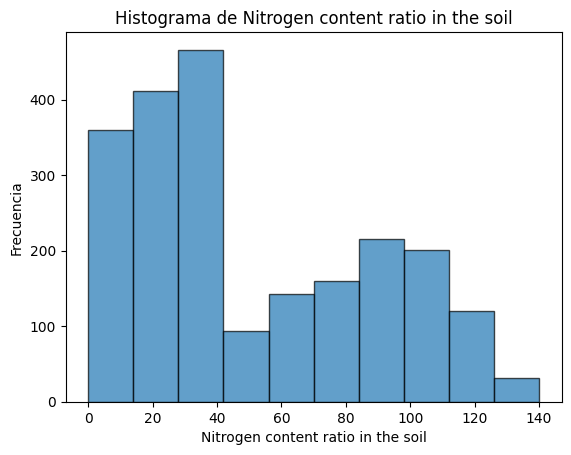

In [10]:
# Crear el histograma
plt.hist(crops['N'], bins=10, edgecolor='black', alpha=0.7)
# Agregar etiquetas y título
plt.xlabel('Nitrogen content ratio in the soil')
plt.ylabel('Frecuencia')
plt.title('Histograma de Nitrogen content ratio in the soil')

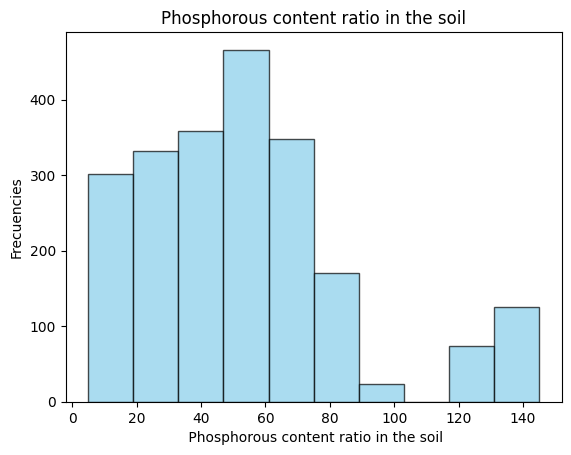

In [11]:
plt.hist(crops['P'],bins=10,edgecolor='black',alpha=0.7,color='skyblue')
plt.xlabel(' Phosphorous content ratio in the soil')
plt.ylabel('Frecuencies')
plt.title('Phosphorous content ratio in the soil')
plt.show()

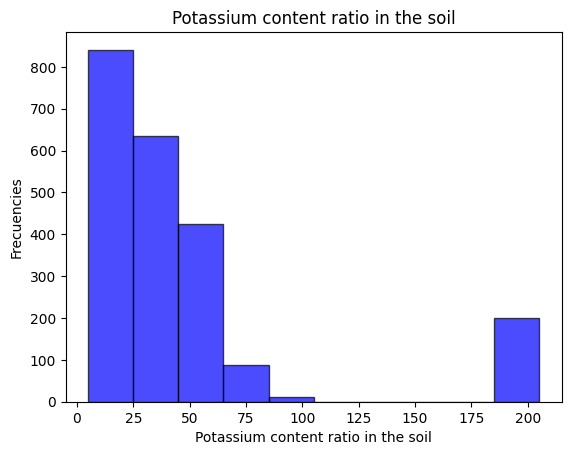

In [12]:
plt.hist(crops['K'],edgecolor='black',alpha=0.7,color='blue')
plt.xlabel('Potassium content ratio in the soil')
plt.ylabel('Frecuencies')
plt.title('Potassium content ratio in the soil')
plt.show()

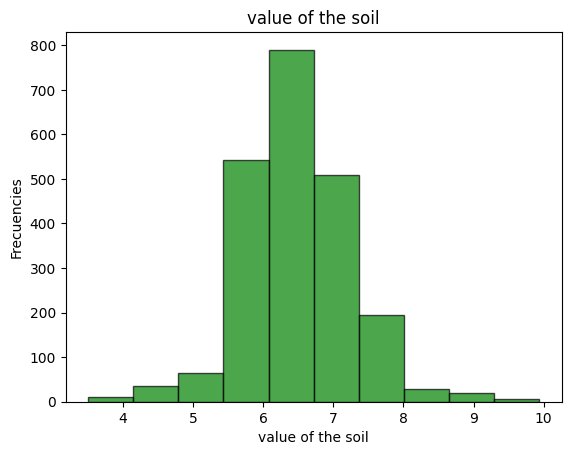

In [13]:
plt.hist(crops['ph'],edgecolor='black',alpha=0.7,color='green')
plt.xlabel('value of the soil')
plt.ylabel('Frecuencies')
plt.title('value of the soil')
plt.show()

# Dividir los datos

In [14]:
X = crops.drop('crop',axis=1)
y = crops['crop']


# Convertir varibles categoricas a numericas como no tenemos orden especifico usaremo one hot

In [15]:
#y_encoded = pd.get_dummies(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
# Asegurar que y_test tenga las mismas columnas que y_train
#y_test = y_test.reindex(columns=y_train.columns, fill_value=0)

# Escalado de los datos

In [18]:
scaled_data = {'StandardScaler':StandardScaler(),
              'MinMaxScale':MinMaxScaler()}
method_scaled = []
for name,method in scaled_data.items():
    scaled_train = method.fit_transform(X_train)
    scaled_test = method.transform(X_test)
    method_scaled.append({'Method':name,'train':scaled_train,'test':scaled_test,'scaler':method})

method_scaled.append({'Method':'Sin_escalar','train':X_train,'test':X_test,'scaler':None})   

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1540, 4)
(660, 4)
(1540,)
(660,)


In [20]:
print(method_scaled[0]['test'].shape)
print(method_scaled[0]['train'].shape)

(660, 4)
(1540, 4)


In [21]:
for scaled in method_scaled:
    log = LogisticRegression(multi_class="multinomial", solver="saga")
    log.fit(scaled['train'],y_train)
    y_pred = log.predict(scaled['test'])
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    score = log.score(scaled['test'],y_test)
    
    print(f"El metodo con escalamiento de tipo {scaled['Method']}, nos da un restulado de {score} el f1 es{f1}")
    #print(metrics.classification_report(y_test,y_pred))
    #print(scaled['train'])

El metodo con escalamiento de tipo StandardScaler, nos da un restulado de 0.6515151515151515 el f1 es0.6426013947752709
El metodo con escalamiento de tipo MinMaxScale, nos da un restulado de 0.5484848484848485 el f1 es0.5124047398993848
El metodo con escalamiento de tipo Sin_escalar, nos da un restulado de 0.556060606060606 el f1 es0.5280252417323663


/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_mod

# Mejorando algorimto

sabemos ahora que el mejor escalamiento es standarscale por que lo que ahora buscaremos los hiperparametros 

In [22]:
log_reg = LogisticRegression(multi_class="multinomial", solver="saga")

# Definir hiperparámetros a probar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controla la regularización
    'max_iter': [100, 200, 500]  # Número de iteraciones
}

# Aplicar GridSearchCV con validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(method_scaled[0]['train'], y_train)  # Usar el mejor escalamiento (StandardScaler)

# Ver los mejores hiperparámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor F1-score:", grid_search.best_score_)

/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_mod

Mejores parámetros: {'C': 100, 'max_iter': 500}
Mejor F1-score: 0.7008393361553282


/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Evaluando el resultado de optimizar el algoritmo y el escalado 

In [23]:
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(method_scaled[0]['test'])

# Evaluar el modelo
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")

print("🔍 Evaluación del Mejor Modelo:")
print(f"✔ Accuracy: {accuracy:.4f}")
print(f"✔ F1-score: {f1:.4f}")
print(f"✔ Recall: {recall:.4f}")
print(f"✔ Precisión: {precision:.4f}")


🔍 Evaluación del Mejor Modelo:
✔ Accuracy: 0.6939
✔ F1-score: 0.6894
✔ Recall: 0.6939
✔ Precisión: 0.7084


# Guardamos el modelo para despues ejecutarlo

In [24]:
import joblib

# Guardar el modelo
joblib.dump(best_model, "modelo_entrenado.pkl")

# Cargarlo después sin reentrenar
modelo_cargado = joblib.load("modelo_entrenado.pkl")


In [25]:
# Escalar los nuevos datos igual que antes
nuevo_dato = [[90, 42, 43, 6.502985292]]  # Ejemplo de un nuevo dato (N, P, K, pH)
nuevo_dato_scaled = method_scaled[0]['scaler'].transform(nuevo_dato)

# Hacer predicción
prediccion = modelo_cargado.predict(nuevo_dato_scaled)
print("Predicción para el nuevo dato:", prediccion)


Predicción para el nuevo dato: ['rice']


/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/Regresion_Lineal/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
